In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt, arctan2, pi
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error
from pathlib import Path

In [2]:
path = Path(Path.cwd())
ficheiros_out = path / 'ficheiros' 
imagens_out = path / 'imagens' 
tabelas_resultados_out = path / 'tabelas_resultados' 

In [3]:
def unconverter(array):
    pred_raio = np.sqrt(array[:,0]**2 + array[:,1]**2)
    pred_theta = np.arctan2(array[:,1], array[:,0]) * 180 / np.pi 
    pred_theta[pred_theta < 0] += 360
    output = np.zeros_like(np.column_stack((array[:,0], array[:,1])))
    output[:, 0] = pred_raio
    output[:, 1] = pred_theta
    return output

def prediction_maker(x,y, metrics_dictionary, name, amostra, switch):
    if switch == 0:
        reg = LinearRegression().fit(x, y)
        pred = reg.predict(x)
        m = reg.coef_
        b = reg.intercept_
        mse = mean_squared_error(y, pred)
        mae = mean_absolute_error(y, pred)
        r2 = r2_score(y, pred)

        metrics_dictionary[name+amostra] = {
            'm': m,
            'b': b,
            'mse': mse,
            'mae': mae,
            'r2': r2
        }
    elif switch == 1:
        reg = LinearRegression().fit(y, x)
        m = reg.coef_
        b = reg.intercept_
        pred = (x-b)/m
        mse = mean_squared_error(y, pred)
        mae = mean_absolute_error(y, pred)
        r2 = r2_score(y, pred)

        metrics_dictionary[name+amostra] = {
            'm': m,
            'b': b,
            'mse': mse,
            'mae': mae,
            'r2': r2
        }
    return pred

def data_visualizer_plot(x, y, y_pred, title, x_label, y_label, path):
    plt.plot(x, y_pred, color='red', label='Predicted points')
    plt.scatter(x, y, color='blue', label='Data points')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.show()

def data_visualizer_scatter(x, y, y_pred, title, x_label, y_label, path):
    plt.scatter(x, y_pred, color='red', label='Predicted points')
    plt.scatter(x, y, color='blue', label='Data points')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.show()

def linear_regression_Ant_TCA(file_name, metrics_dictionary, amostra):
    df = pd.read_excel(file_name)
    C_Ant_parte_real = df['C_Ant_parte_real'].to_numpy().reshape(-1, 1)
    C_Ant_parte_imaginaria = df['C_Ant_parte_imaginaria'].to_numpy().reshape(-1, 1)
    C_TCA_parte_real = df['C_TCA_parte_real'].to_numpy().reshape(-1, 1)
    C_TCA_parte_imaginaria = df['C_TCA_parte_imaginaria'].to_numpy().reshape(-1, 1)

    pred_real_TCA = prediction_maker(C_Ant_parte_real, C_TCA_parte_real, metrics_dictionary, 'parte real ', amostra, 0)
    pred_imaginaria_TCA = prediction_maker(C_Ant_parte_imaginaria, C_TCA_parte_imaginaria, metrics_dictionary, 'parte imaginaria ', amostra, 0)
    df['C_TCA_parte_real_pred'] = pred_real_TCA
    df['C_TCA_parte_imaginaria_pred'] = pred_imaginaria_TCA
    df['C_TCA_Ast_pred'] = unconverter(np.column_stack((pred_real_TCA, pred_imaginaria_TCA)))[:,0]
    df['C_TCA_Axis_pred'] = unconverter(np.column_stack((pred_real_TCA, pred_imaginaria_TCA)))[:,1]

    df.to_excel(file_name)
    temp_out = imagens_out / 'regressao_linear' / 'relacao_anterior_TCA' 

    data_visualizer_plot(C_Ant_parte_real, C_TCA_parte_real , pred_real_TCA, f"Regressão linear parte real de TCA a partir de Ant em amostra {amostra}", 'Parte real Anterior', 'Parte real TCA', f"{temp_out}/lr_parte_real_ant_tca_{amostra}.png")
    data_visualizer_plot(C_Ant_parte_imaginaria, C_TCA_parte_imaginaria , pred_imaginaria_TCA, f"Regressão linear parte imaginaria de TCA a partir de Ant em amostra {amostra}", 'Parte imaginaria Anterior', 'Parte imaginaria TCA', f"{temp_out}/lr_parte_imaginaria_ant_tca_{amostra}.png")

    data_visualizer_scatter(df['C_Ant_Ast'], df['C_TCA_Ast'] , df['C_TCA_Ast_pred'], f"Magnitude da regressão linear de TCA a partir de Ant em amostra {amostra}", 'Magnitude Anterior', 'Magnitude TCA', f"{temp_out}/lr_magnitude_ant_tca_{amostra}.png")
    data_visualizer_scatter(df['C_Ant_Axis_360'], df['C_TCA_Axis_360'] , df['C_TCA_Axis_pred'], f"Eixo da regressão linear de TCA a partir de Ant em amostra {amostra}", 'Eixo Anterior', 'Eixo TCA', f"{temp_out}/lr_eixo_ant_tca_{amostra}.png")

def linear_regression_Ant_Post(file_name, metrics_dictionary, amostra):
    df = pd.read_excel(file_name)

    C_Ant_parte_real = df['C_Ant_parte_real'].to_numpy().reshape(-1, 1)
    C_Ant_parte_imaginaria = df['C_Ant_parte_imaginaria'].to_numpy().reshape(-1, 1)
    C_Post_parte_real = df['C_Post_parte_real'].to_numpy().reshape(-1, 1)
    C_Post_parte_imaginaria = df['C_Post_parte_imaginaria'].to_numpy().reshape(-1, 1)

    pred_real_Post = prediction_maker(C_Ant_parte_real, C_Post_parte_real, metrics_dictionary, 'parte real ', amostra, 0)
    pred_imaginaria_Post = prediction_maker(C_Ant_parte_imaginaria, C_Post_parte_imaginaria, metrics_dictionary, 'parte imaginaria ', amostra, 1)
    df['C_Post_parte_real_pred'] = pred_real_Post
    df['C_Post_parte_imaginaria_pred'] = pred_imaginaria_Post
    df['C_Post_Ast_pred'] = unconverter(np.column_stack((pred_real_Post, pred_imaginaria_Post)))[:,0]
    df['C_Post_Axis_pred'] = unconverter(np.column_stack((pred_real_Post, pred_imaginaria_Post)))[:,1]

    df.to_excel(file_name)

    temp_out = imagens_out / 'regressao_linear' / 'relacao_anterior_posterior' 

    data_visualizer_plot(C_Ant_parte_real, C_Post_parte_real , pred_real_Post, f"Regressão linear parte real de Post a partir de Ant em amostra {amostra}", 'Parte real Anterior', 'parte real Posterior', f"{temp_out}/lr_parte_real_ant_post_{amostra}.png")
    data_visualizer_plot(C_Ant_parte_imaginaria, C_Post_parte_imaginaria , pred_imaginaria_Post, f"Regressão linear parte imaginaria de Post a partir de Ant em amostra {amostra}", 'Parte imaginária Anterior', 'parte imaginária Posterior', f"{temp_out}/lr_parte_imaginaria_ant_post_{amostra}.png")

    data_visualizer_scatter(df['C_Ant_Ast'], df['C_Post_Ast'] , df['C_Post_Ast_pred'], f"Magnitude da regressão linear de Post a partir de Ant em amostra {amostra}", 'Magnitude Anterior', 'Magnitude Posterior', f"{temp_out}/lr_magnitude_ant_post_{amostra}.png")
    data_visualizer_scatter(df['C_Ant_Axis_360'], df['C_Post_Axis_360'] , df['C_Post_Axis_pred'], f"Eixo da regressão linear de Post a partir de Ant em amostra {amostra}", 'Eixo Anterior', 'Eixo Posterior', f"{temp_out}/lr_eixo_ant_post_{amostra}.png")

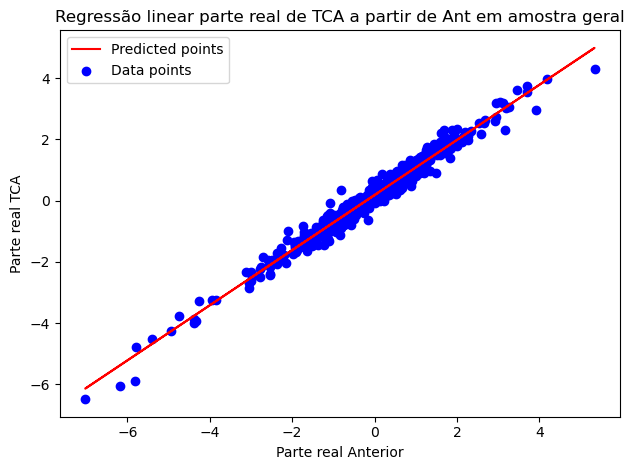

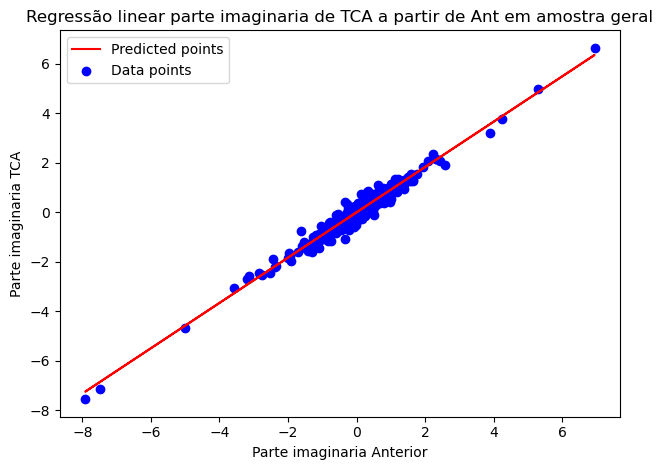

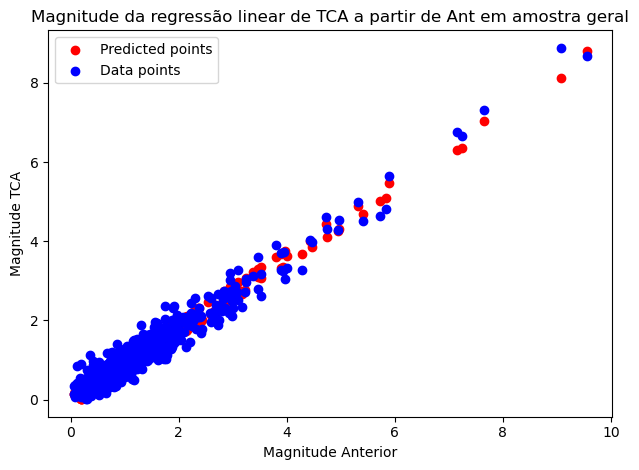

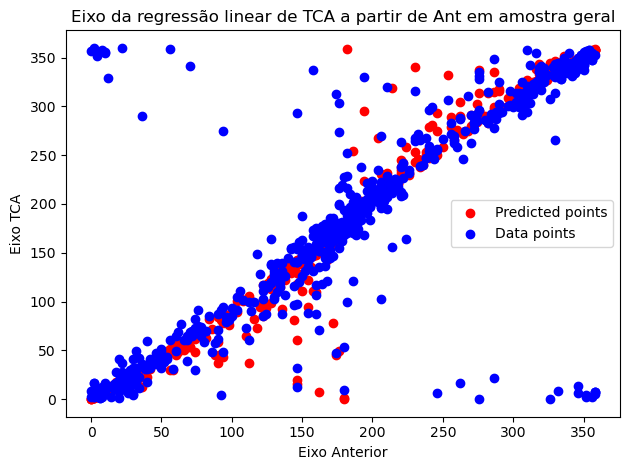

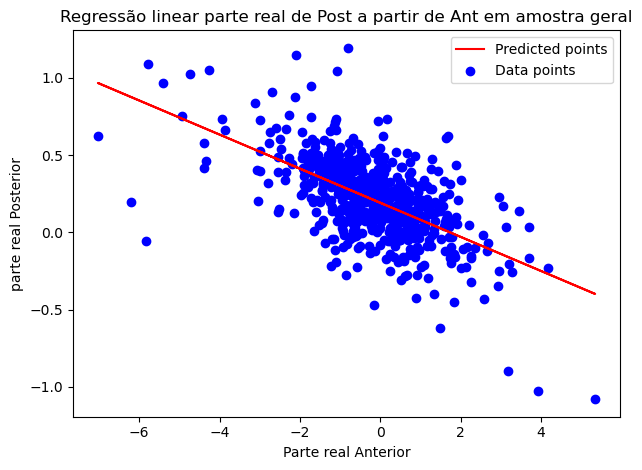

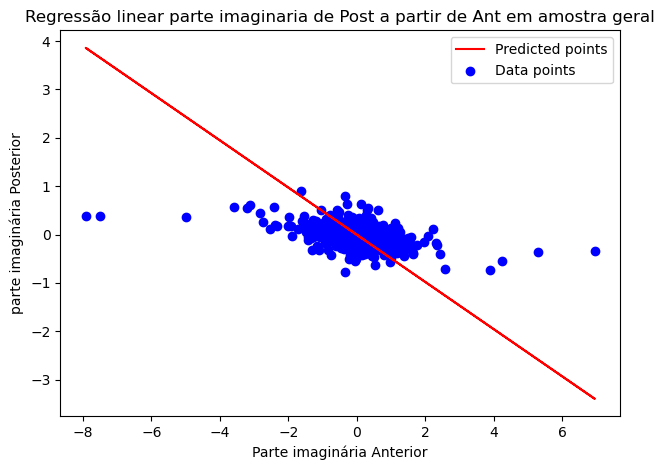

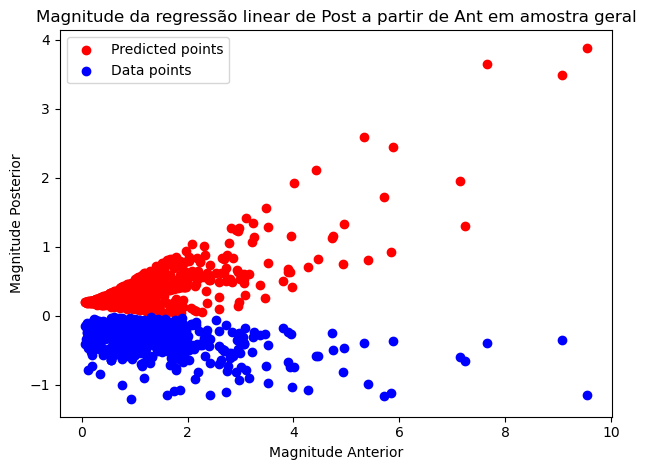

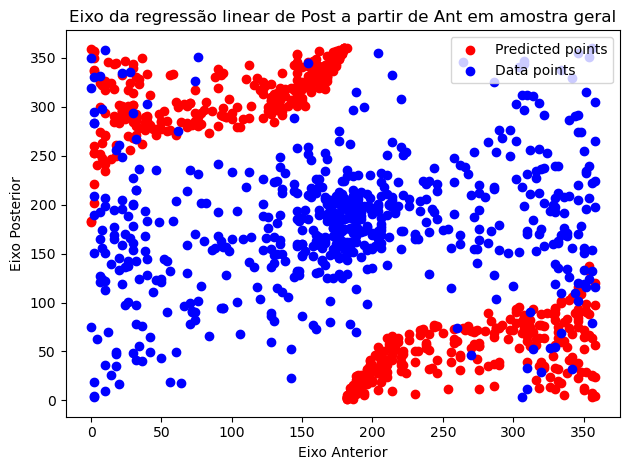

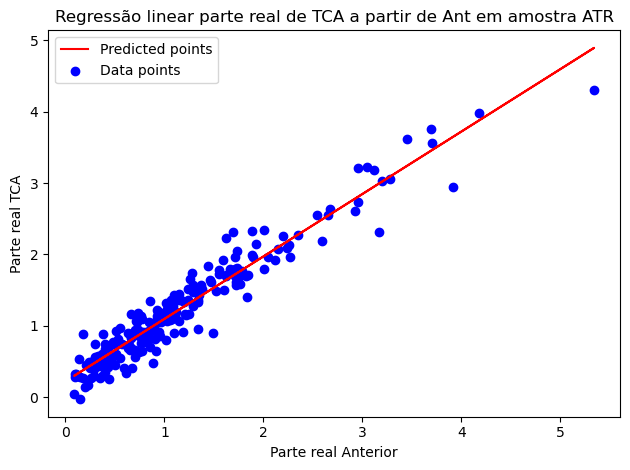

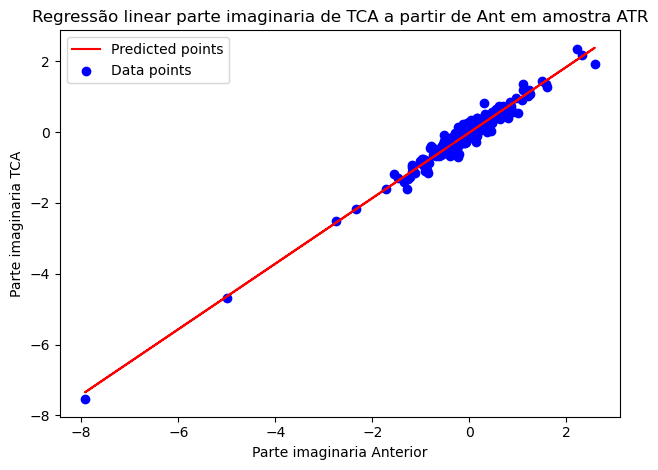

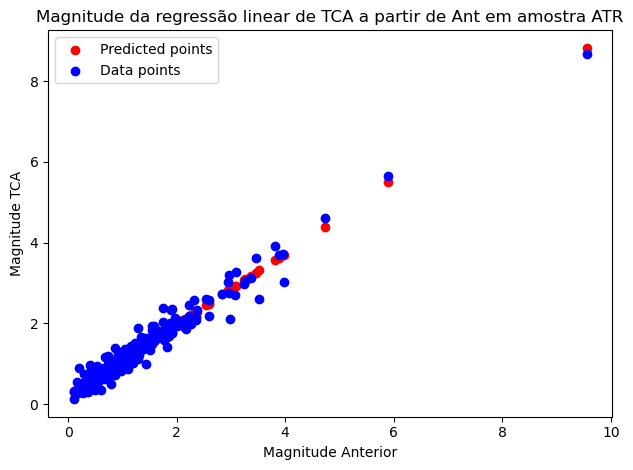

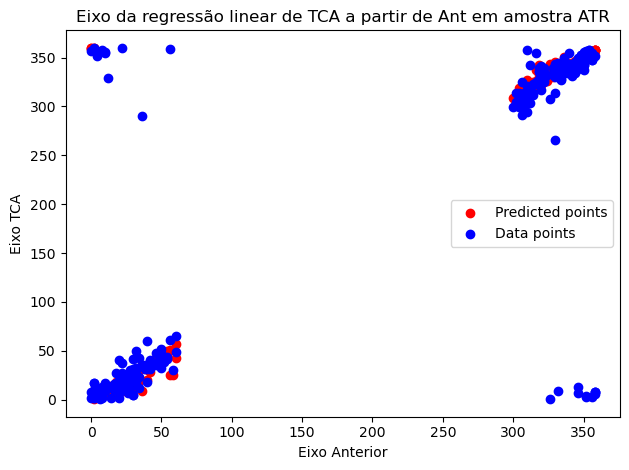

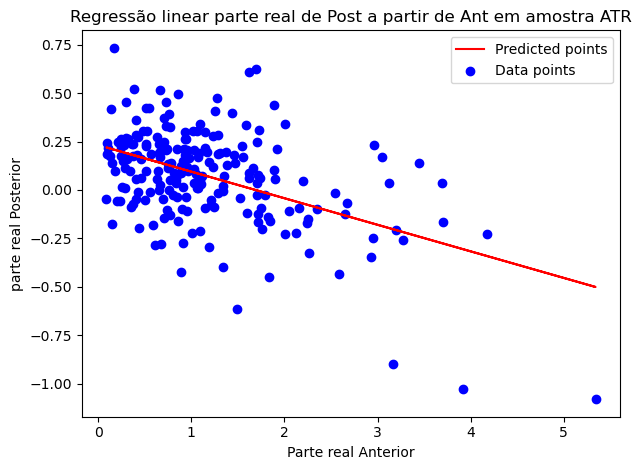

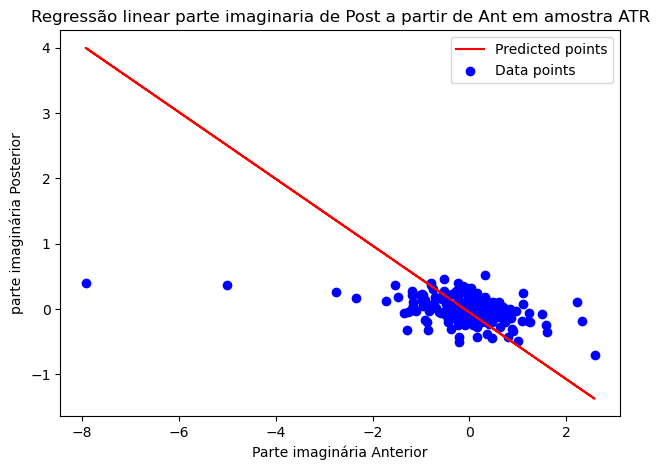

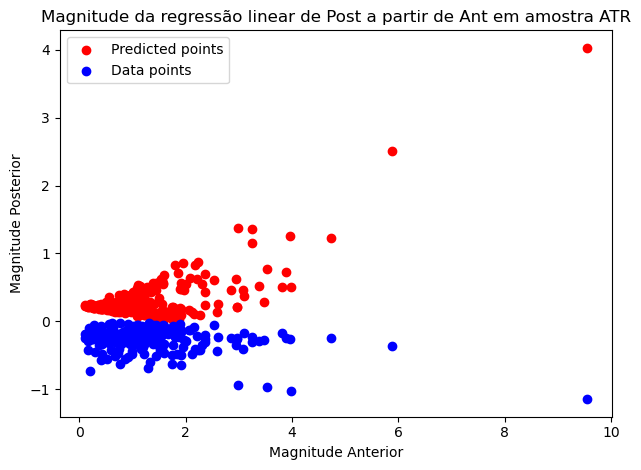

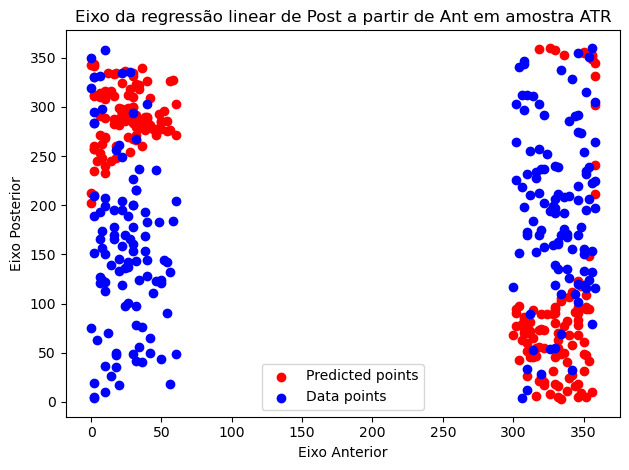

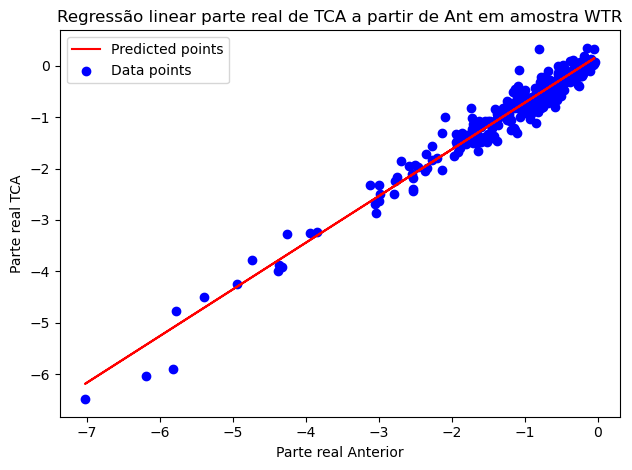

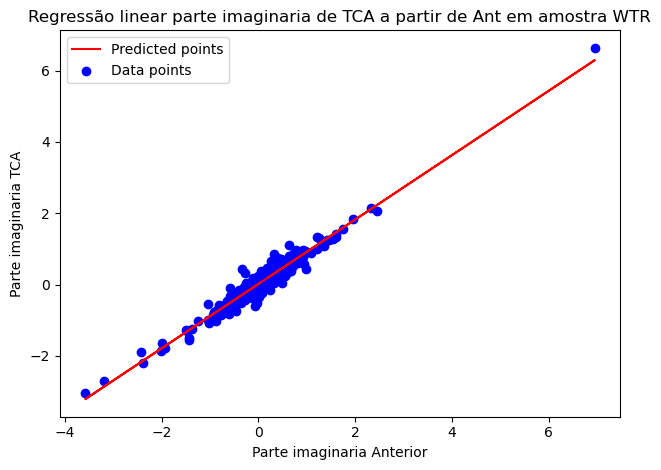

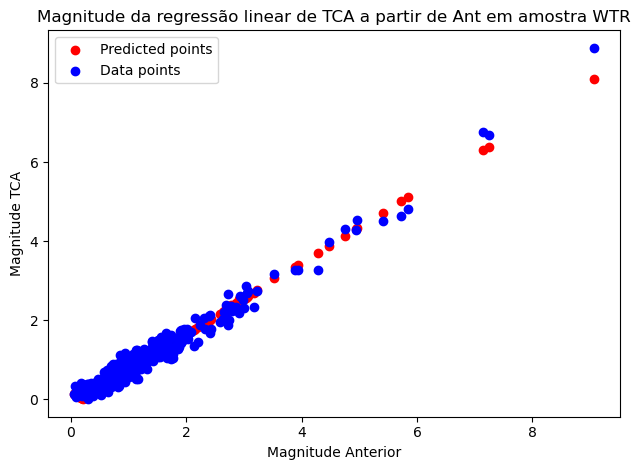

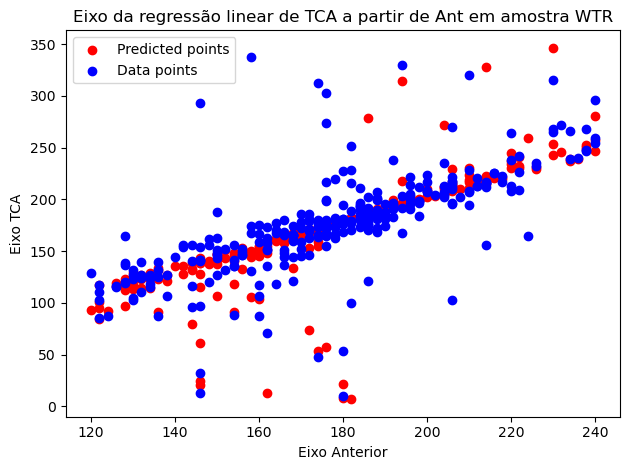

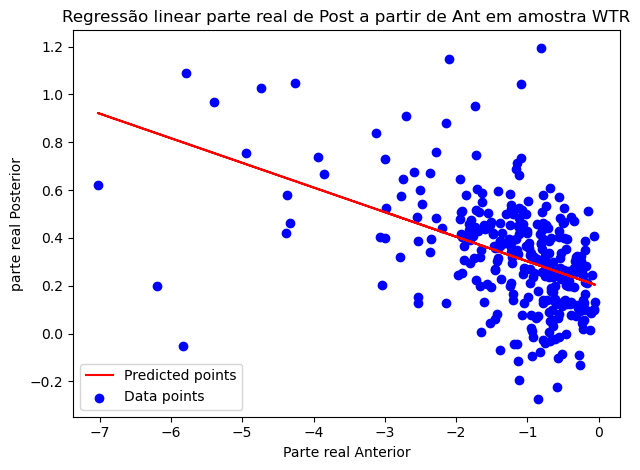

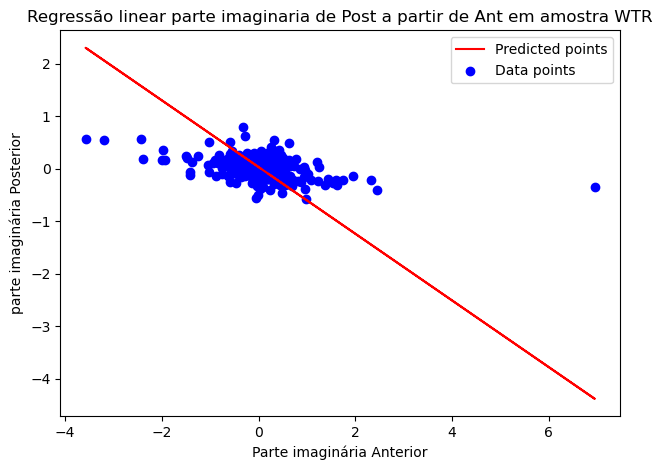

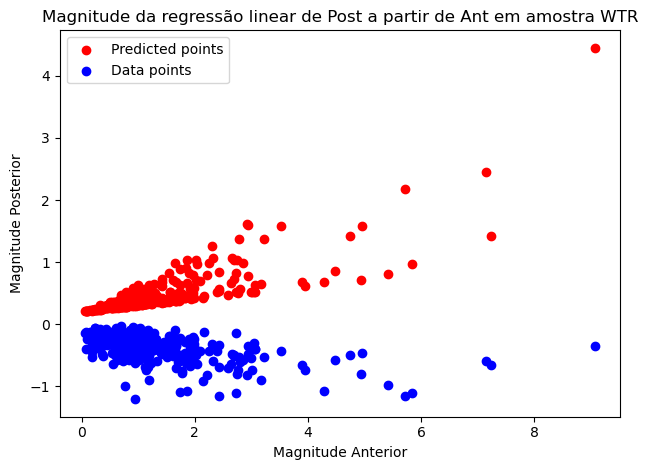

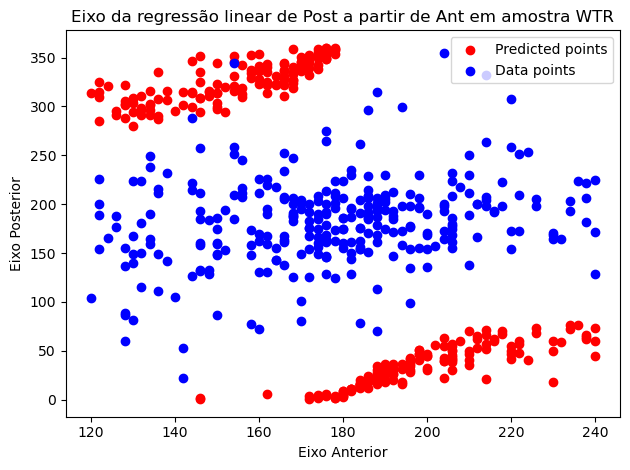

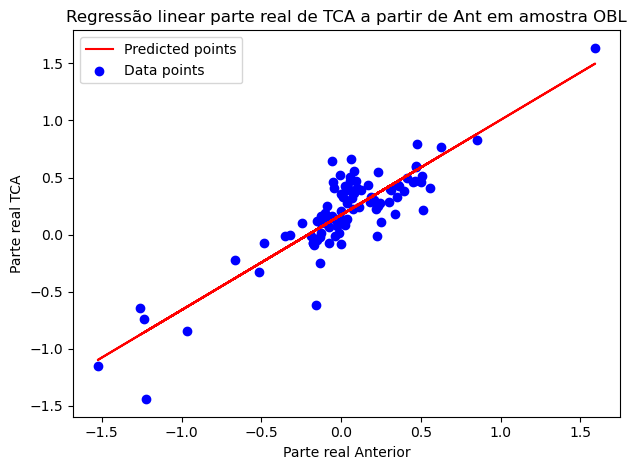

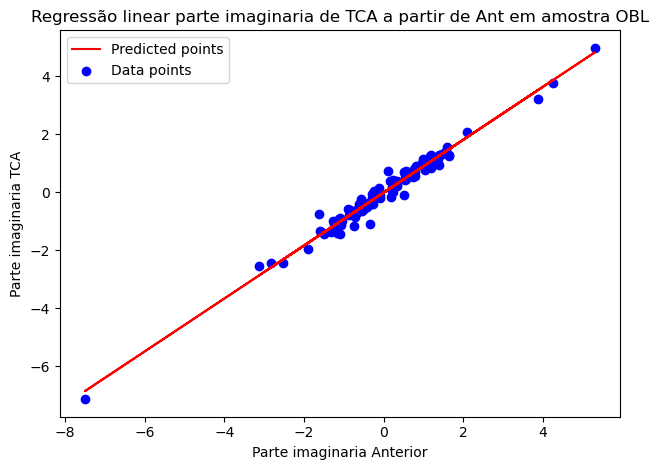

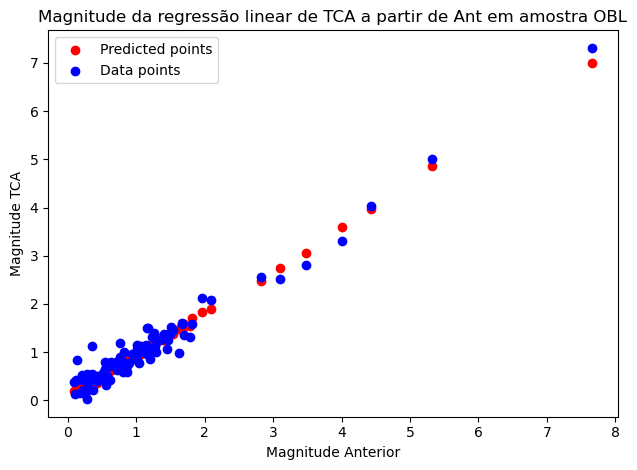

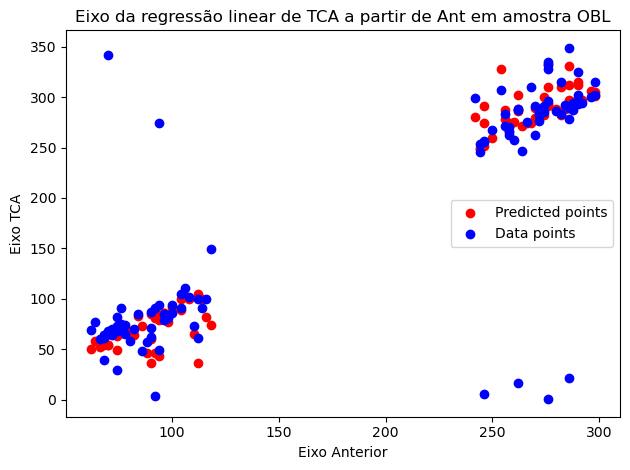

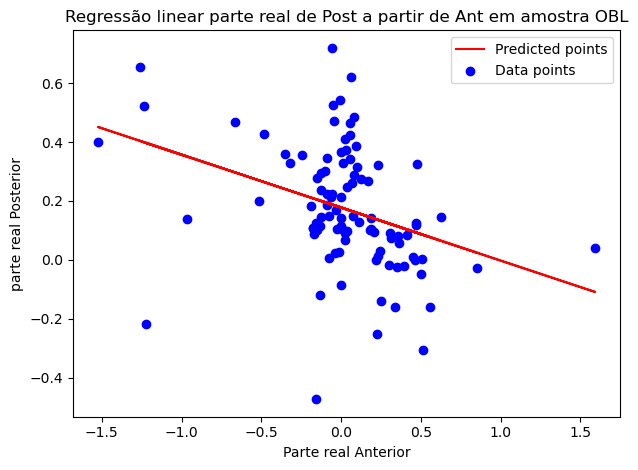

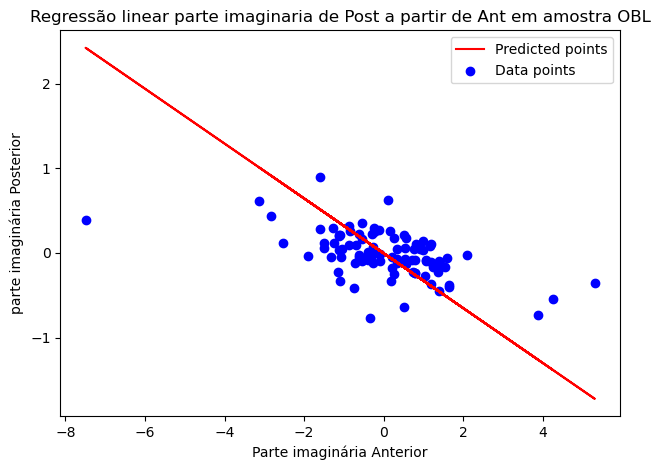

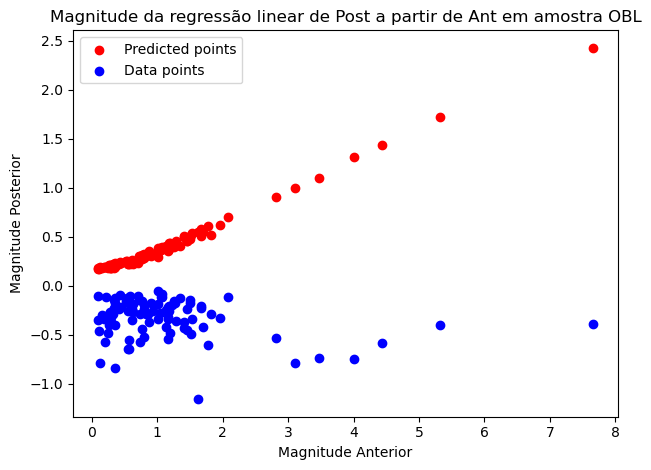

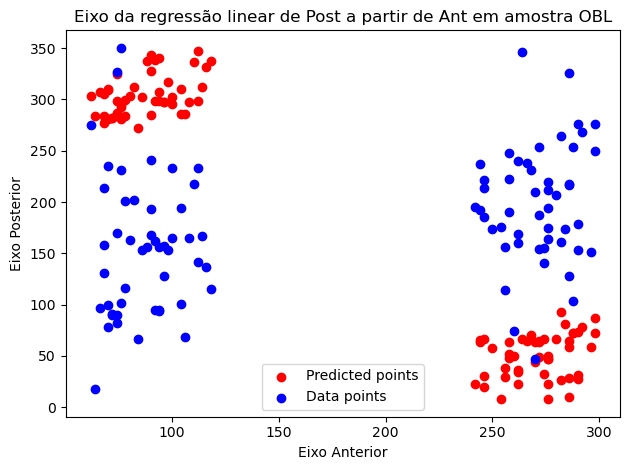

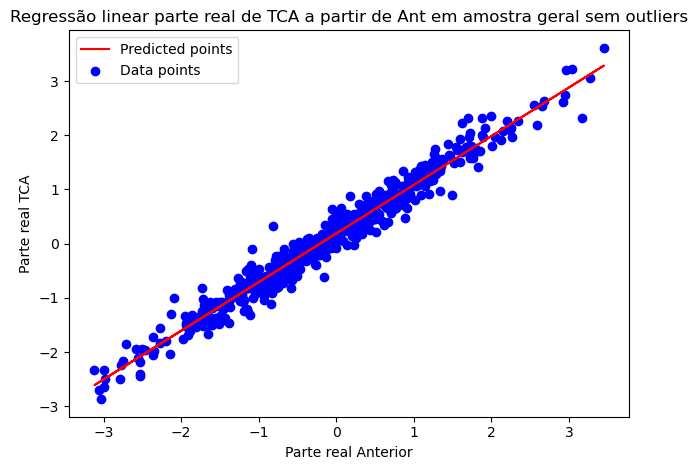

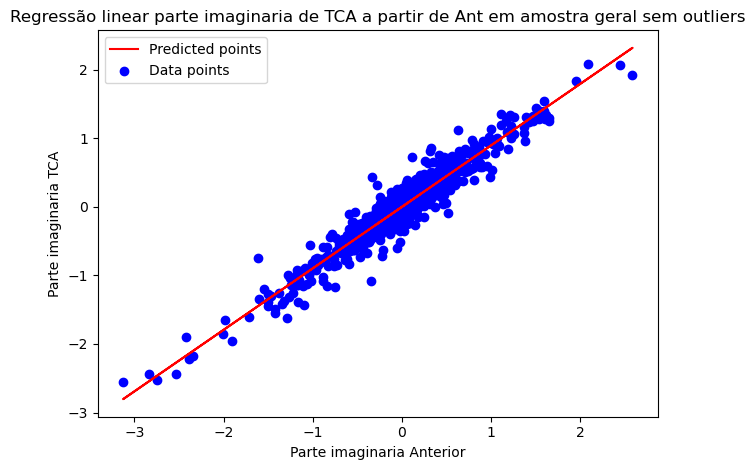

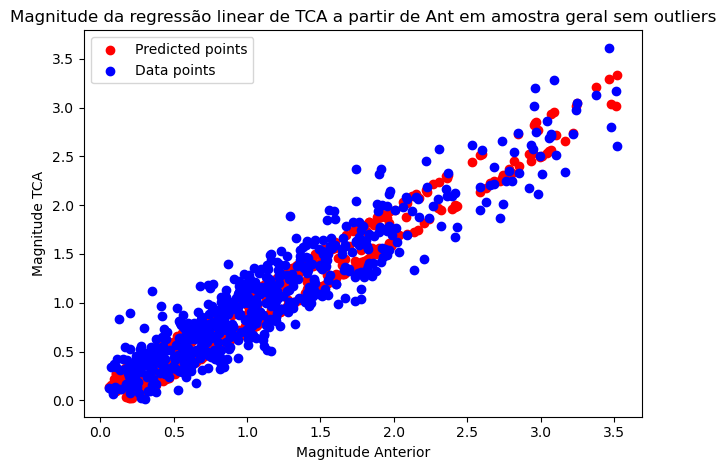

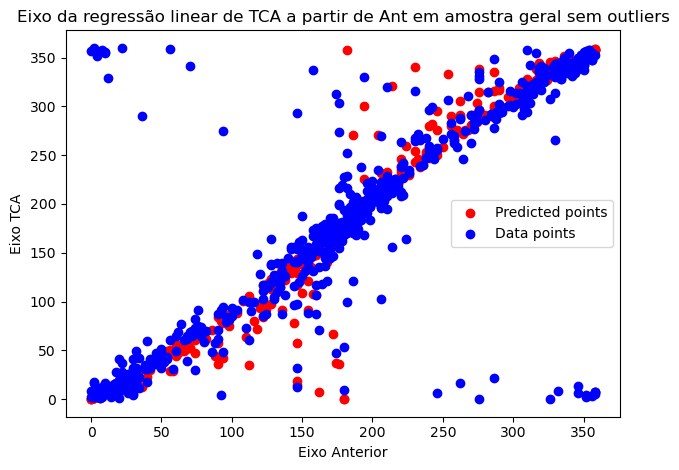

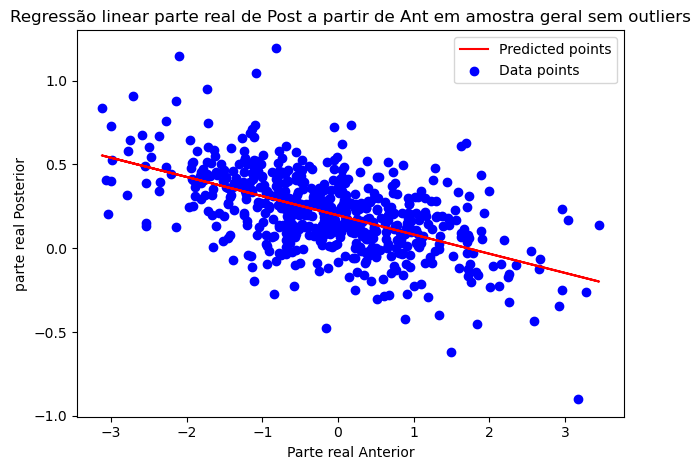

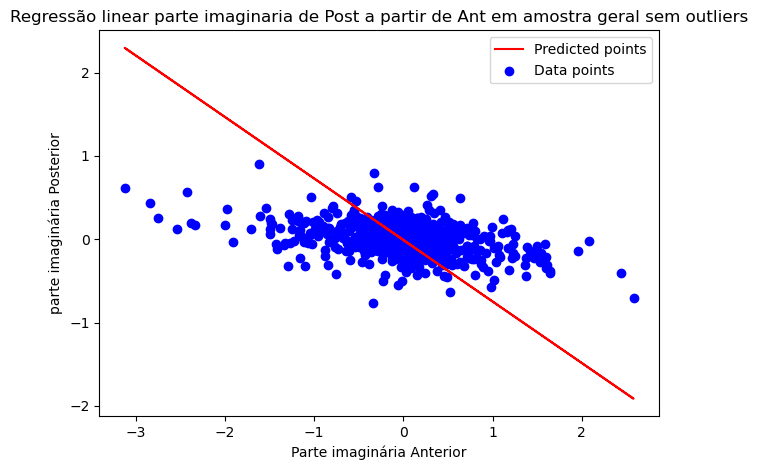

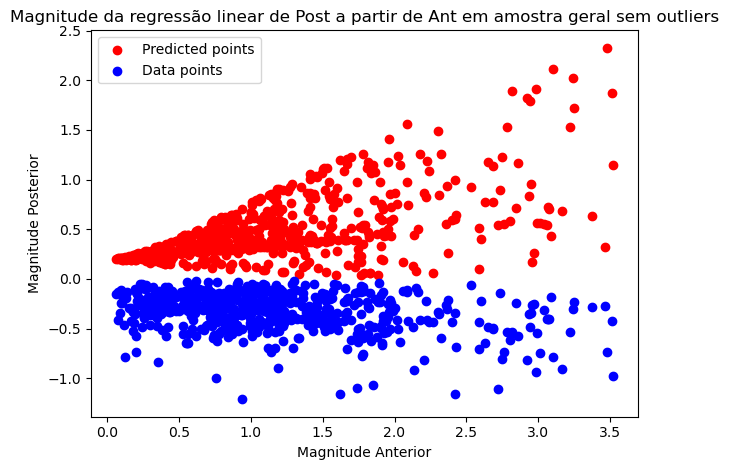

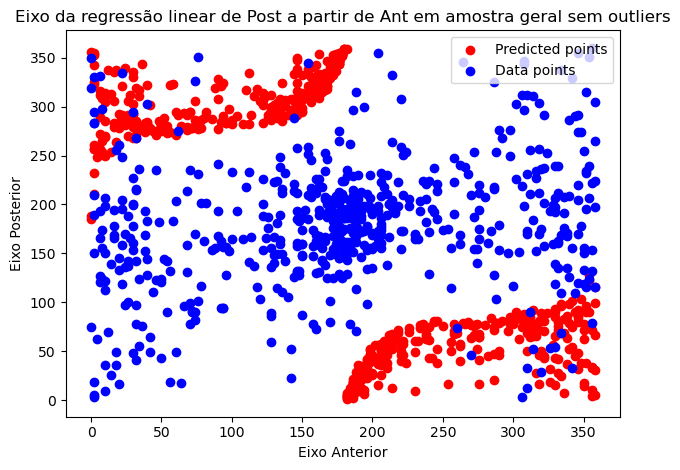

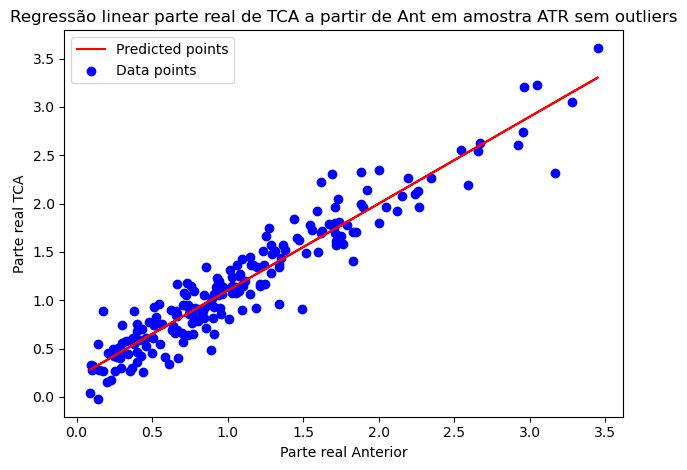

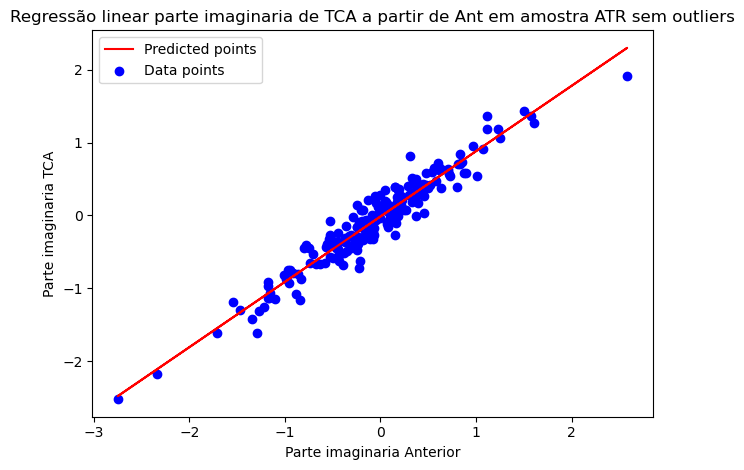

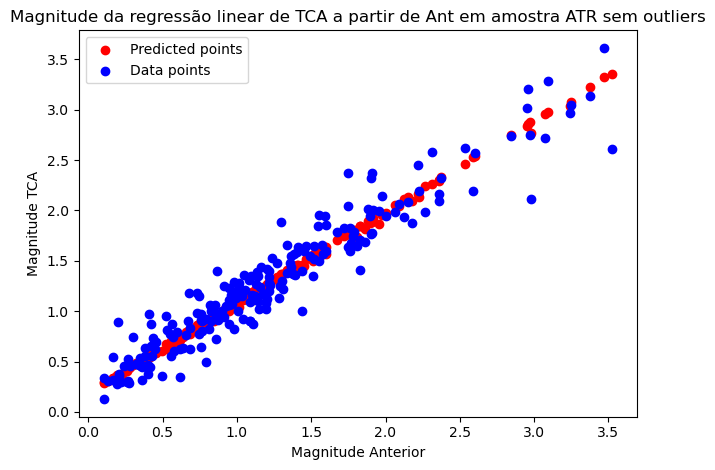

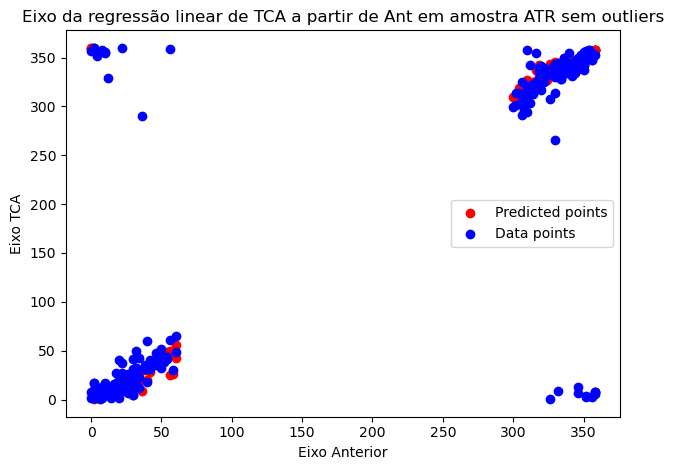

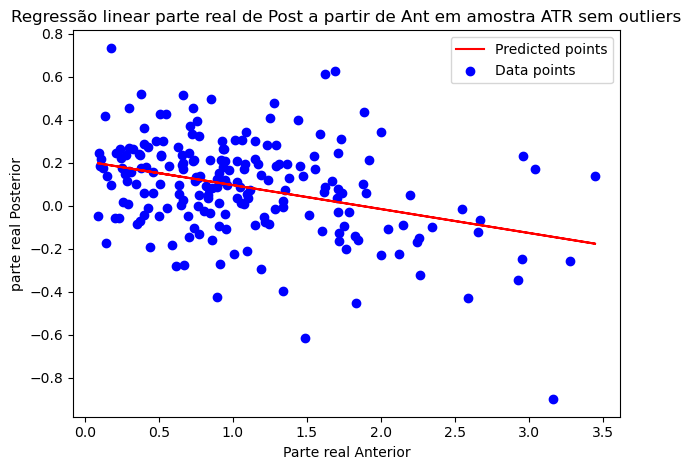

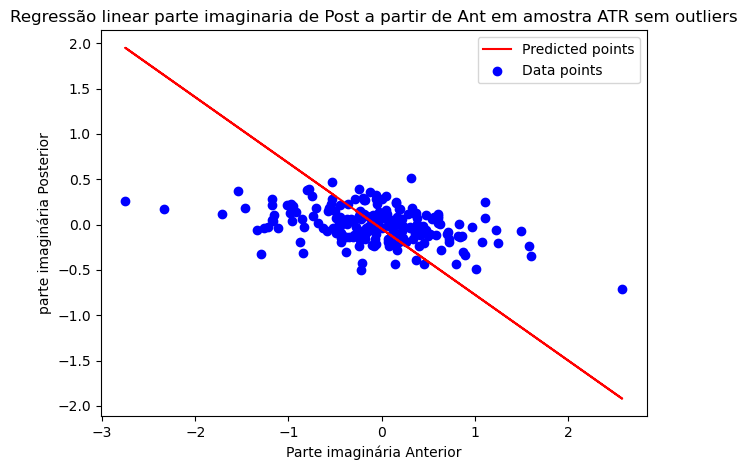

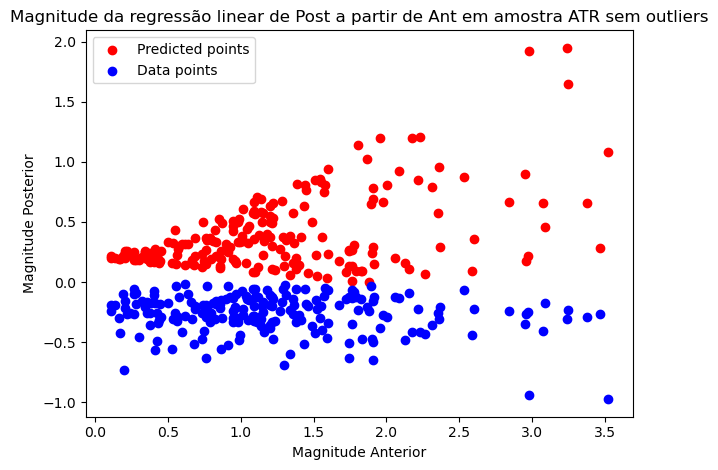

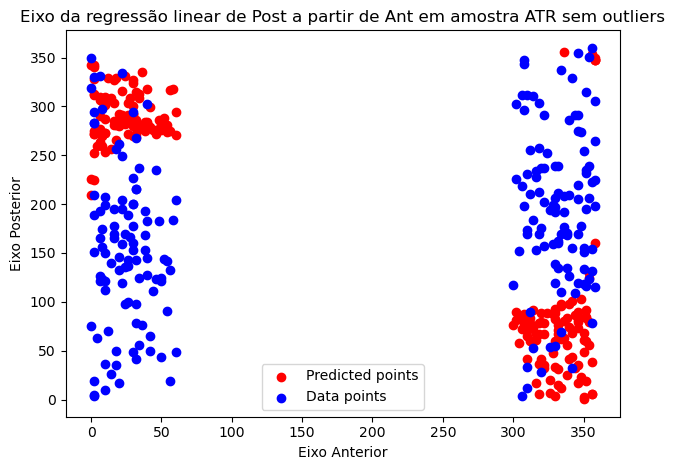

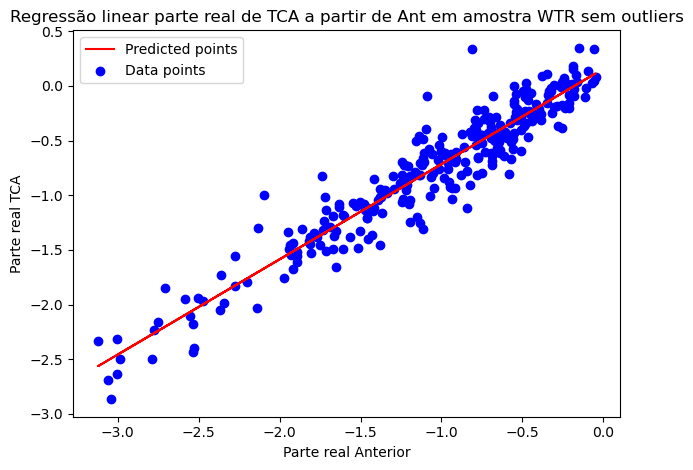

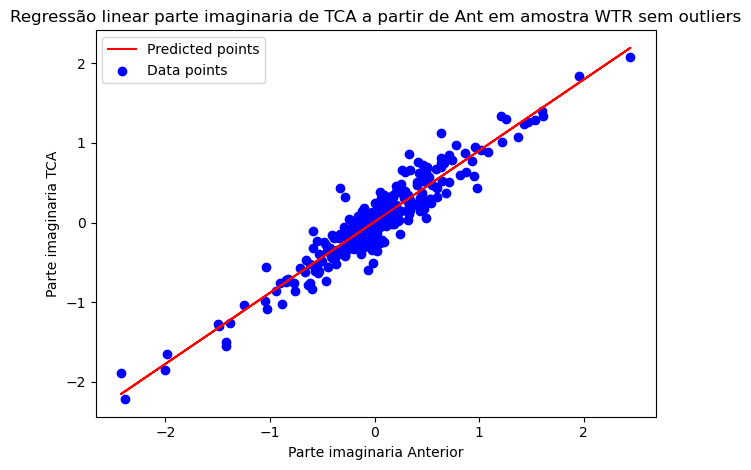

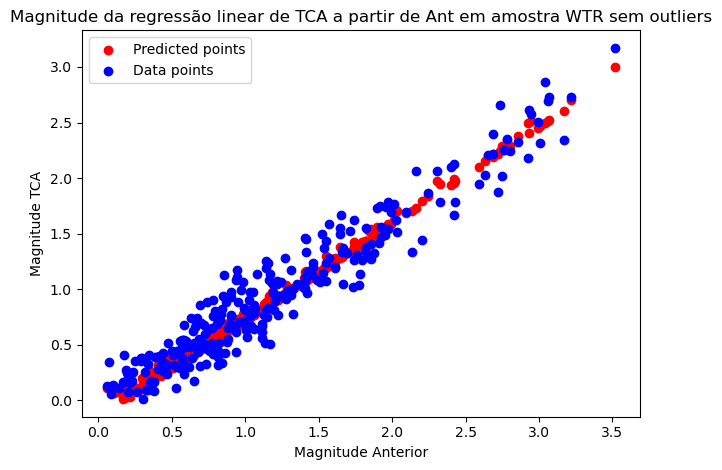

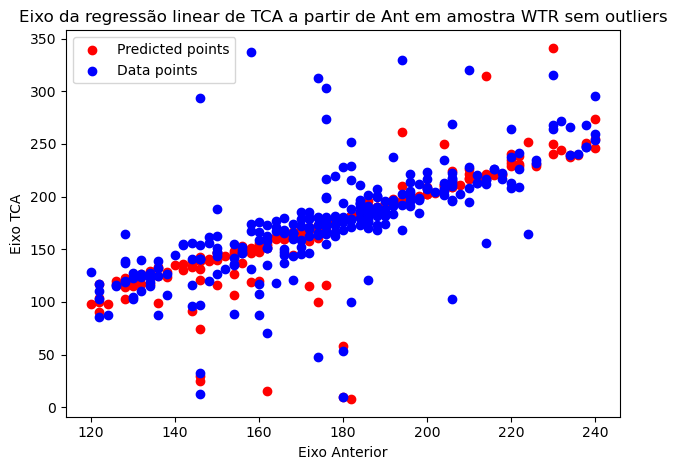

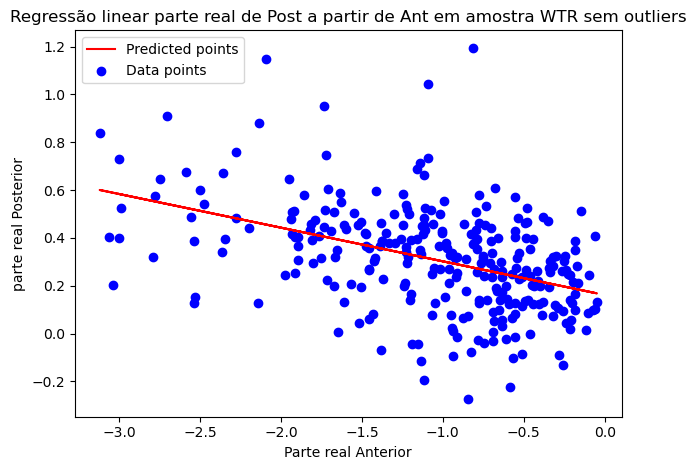

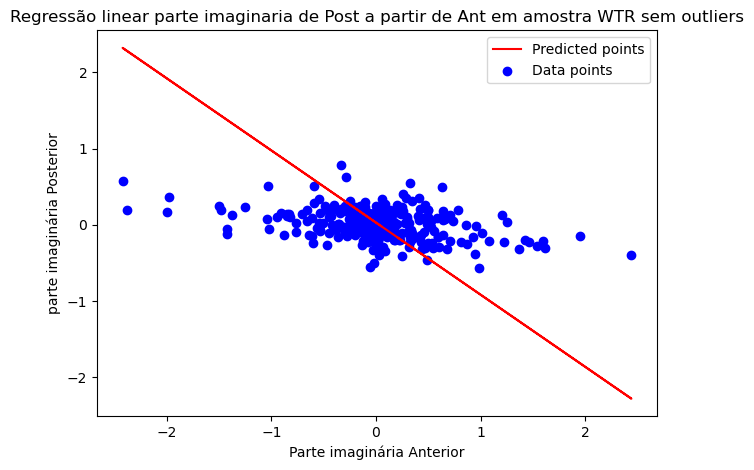

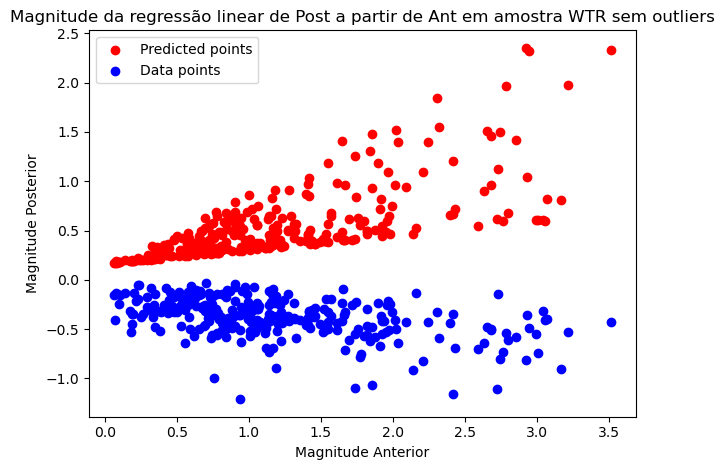

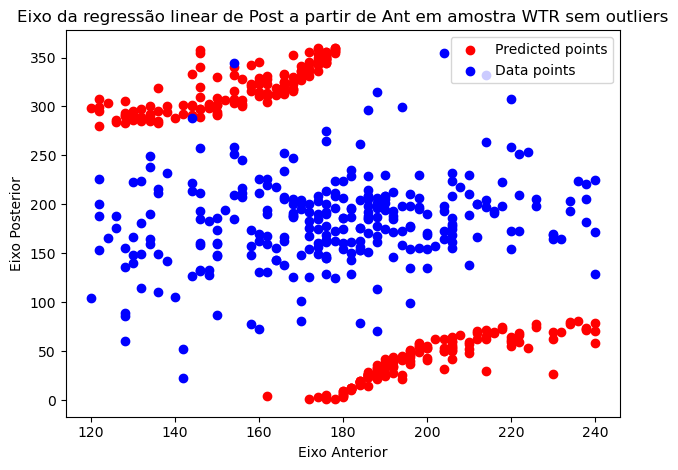

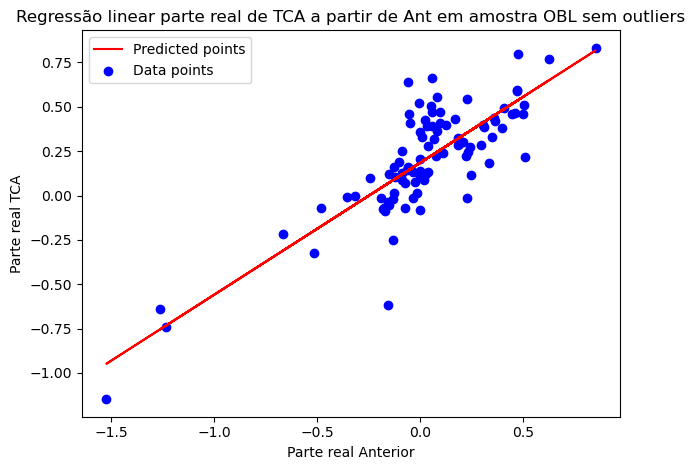

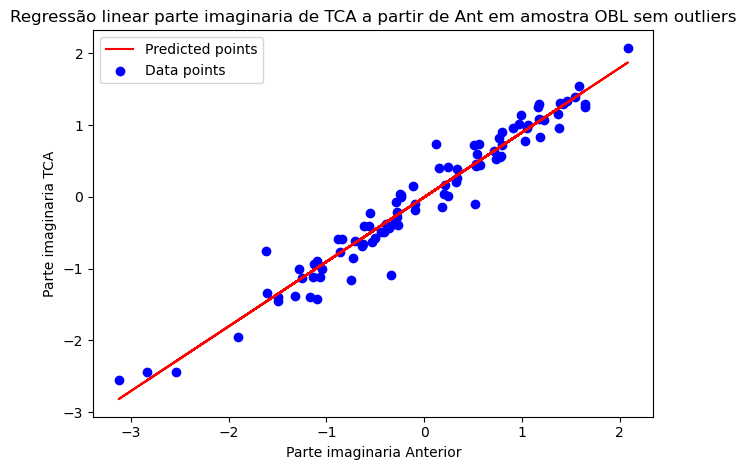

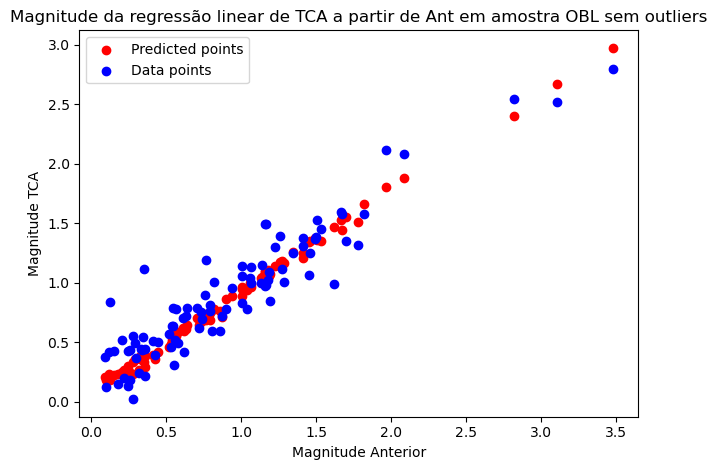

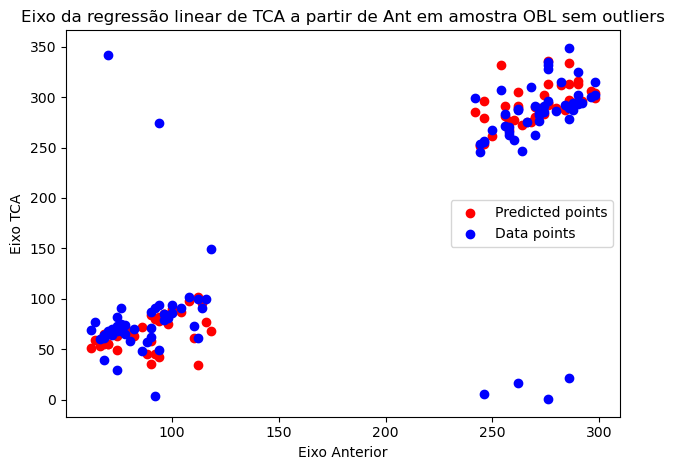

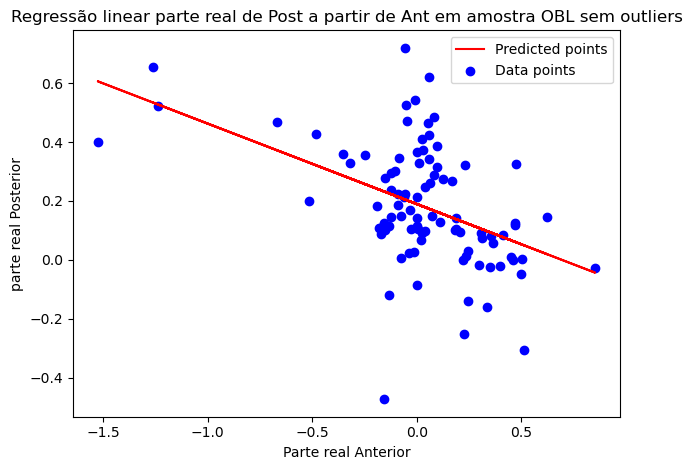

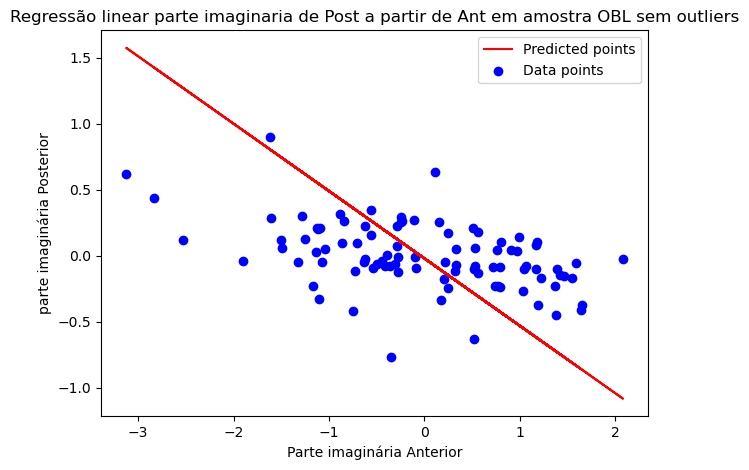

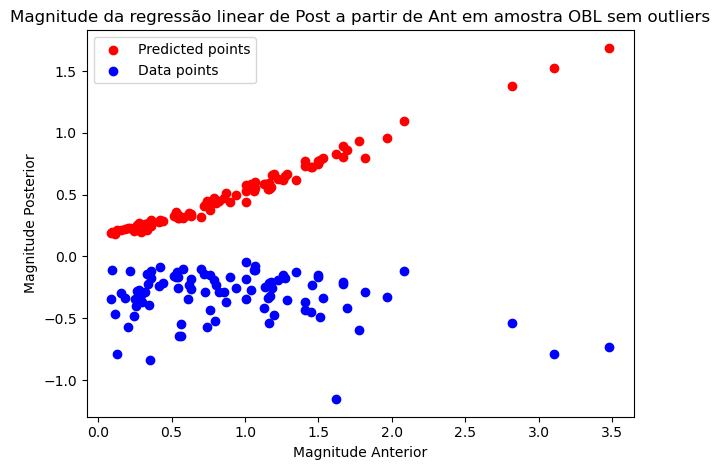

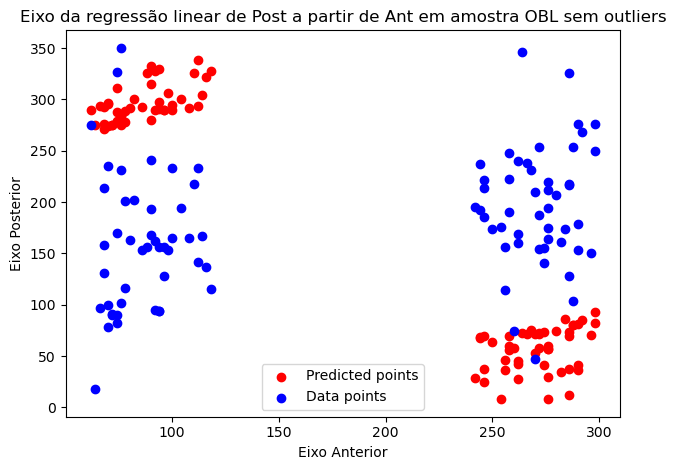

In [4]:
amostra_vector = ['geral','ATR', 'WTR', 'OBL', 'geral sem outliers', 'ATR sem outliers', 'WTR sem outliers', 'OBL sem outliers']
file_name_vector = [ficheiros_out / 'cassini_geral.xlsx', ficheiros_out / 'cassini_atr.xlsx', ficheiros_out / 'cassini_wtr.xlsx',  ficheiros_out / 'cassini_obl.xlsx',  ficheiros_out / 'cassini_geral_sem_outliers.xlsx',  ficheiros_out / 'cassini_atr_sem_outliers.xlsx',  ficheiros_out / 'cassini_wtr_sem_outliers.xlsx',  ficheiros_out / 'cassini_obl_sem_outliers.xlsx']

metrics_dictionary_TCA_prediction = {}
metrics_dictionary_Post_prediction = {}

for i in range(len(file_name_vector)):
    linear_regression_Ant_TCA(file_name_vector[i], metrics_dictionary_TCA_prediction, amostra_vector[i])
    linear_regression_Ant_Post(file_name_vector[i], metrics_dictionary_Post_prediction, amostra_vector[i])
   
df = pd.DataFrame(metrics_dictionary_TCA_prediction).T 
df.to_excel(tabelas_resultados_out / 'regression_results_TCA.xlsx', index=True)
df = pd.DataFrame(metrics_dictionary_Post_prediction).T 
df.to_excel(tabelas_resultados_out / 'regression_results_Post.xlsx', index=True)